# Fever Analysis and Medication Prediction

Athour

MD Abu Bokkor Siddique

Warren , MI | 313-564-9863 | siddique5002@gmail.com | linkedin.com/in/mdsiddque

Data: DEC 02 2024

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler  # Add this import


from sklearn.metrics import accuracy_score , classification_report

import warnings
warnings.filterwarnings('ignore')

In [63]:
data = pd.read_csv("C:/Users/abu_s/Desktop/Data/Json/Fever Analysis/enhanced_fever_medicine_recommendation.csv")

In [64]:
data.head(3)

,Temperature,Fever_Severity,Age,Gender,BMI,Headache,Body_Ache,Fatigue,Chronic_Conditions,Allergies,Smoking_History,Alcohol_Consumption,Humidity,AQI,Physical_Activity,Diet_Type,Heart_Rate,Blood_Pressure,Previous_Medication,Recommended_Medication
0,36.1,Normal,89,Female,24.0,No,Yes,No,No,Yes,No,Yes,81.4,430,Moderate,Vegan,72,Normal,NaN,Ibuprofen
1,37.5,Mild Fever,94,Male,26.6,No,No,No,Yes,No,Yes,Yes,44.4,10,Active,Vegetarian,62,High,Ibuprofen,Paracetamol
2,36.4,Normal,92,Male,27.8,No,No,No,No,No,No,Yes,73.7,400,Sedentary,Vegan,85,High,NaN,Ibuprofen


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             1000 non-null   float64
 1   Fever_Severity          1000 non-null   object 
 2   Age                     1000 non-null   int64  
 3   Gender                  1000 non-null   object 
 4   BMI                     1000 non-null   float64
 5   Headache                1000 non-null   object 
 6   Body_Ache               1000 non-null   object 
 7   Fatigue                 1000 non-null   object 
 8   Chronic_Conditions      1000 non-null   object 
 9   Allergies               1000 non-null   object 
 10  Smoking_History         1000 non-null   object 
 11  Alcohol_Consumption     1000 non-null   object 
 12  Humidity                1000 non-null   float64
 13  AQI                     1000 non-null   int64  
 14  Physical_Activity       1000 non-null   o

In [66]:
data.describe

<bound method NDFrame.describe of      Temperature Fever_Severity  Age  Gender   BMI Headache Body_Ache Fatigue  \
0           36.1         Normal   89  Female  24.0       No       Yes      No   
1           37.5     Mild Fever   94    Male  26.6       No        No      No   
2           36.4         Normal   92    Male  27.8       No        No      No   
3           39.8     High Fever   66    Male  18.7       No       Yes      No   
4           39.3     High Fever   28    Male  21.0       No       Yes      No   
..           ...            ...  ...     ...   ...      ...       ...     ...   
995         39.9     High Fever   59    Male  22.1      Yes       Yes     Yes   
996         36.9         Normal   74  Female  18.1      Yes       Yes     Yes   
997         36.1         Normal    8  Female  29.6      Yes       Yes      No   
998         38.8     High Fever   87  Female  25.2       No        No      No   
999         38.2     High Fever   65  Female  26.0       No       Yes      

In [67]:
data.isnull().sum()

Temperature                 0
Fever_Severity              0
Age                         0
Gender                      0
BMI                         0
Headache                    0
Body_Ache                   0
Fatigue                     0
Chronic_Conditions          0
Allergies                   0
Smoking_History             0
Alcohol_Consumption         0
Humidity                    0
AQI                         0
Physical_Activity           0
Diet_Type                   0
Heart_Rate                  0
Blood_Pressure              0
Previous_Medication       237
Recommended_Medication      0
dtype: int64

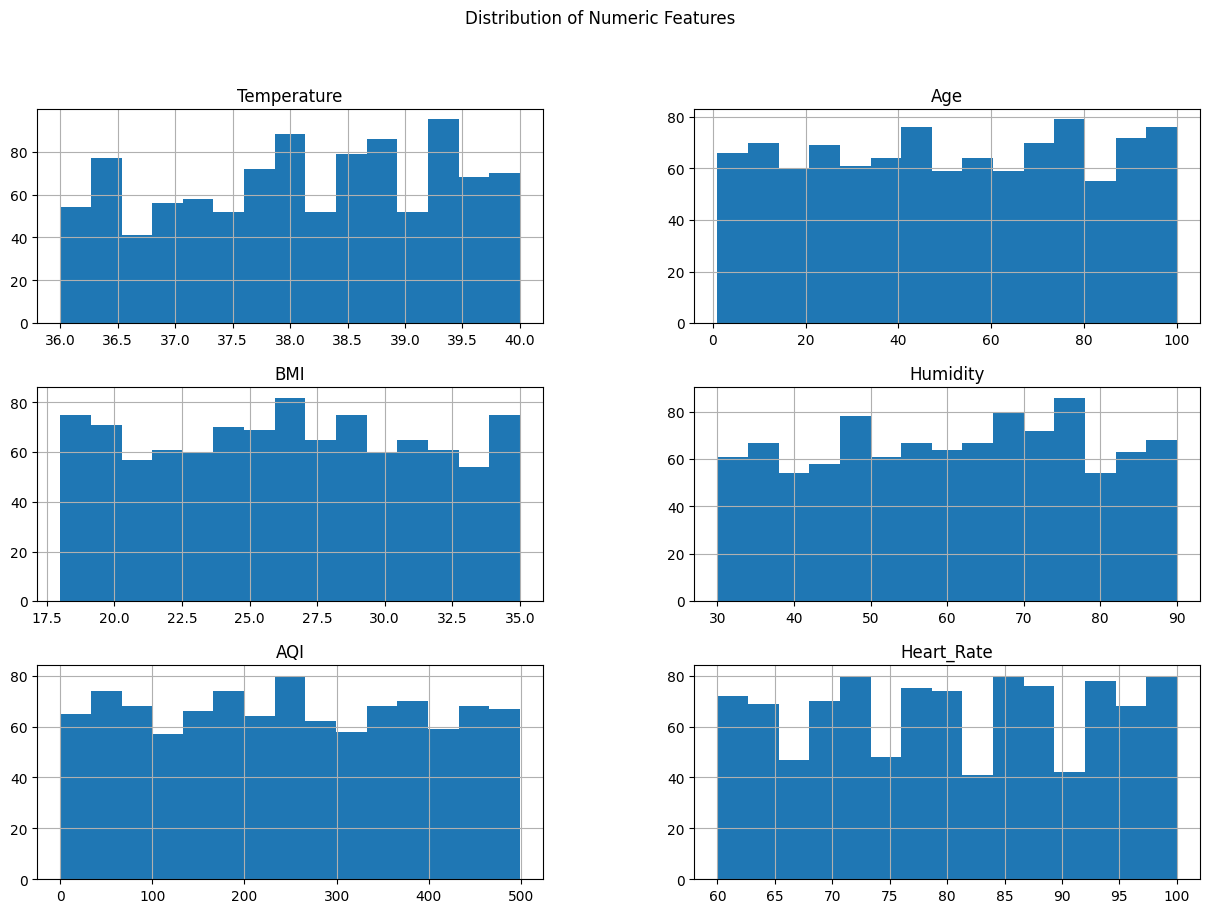

In [68]:
# Plot histograms for numeric variables
numeric_columns = ['Temperature', 'Age', 'BMI', 'Humidity', 'AQI', 'Heart_Rate']
data[numeric_columns].hist(bins=15, figsize=(15, 10), layout=(3, 2))
plt.suptitle('Distribution of Numeric Features')
plt.show()

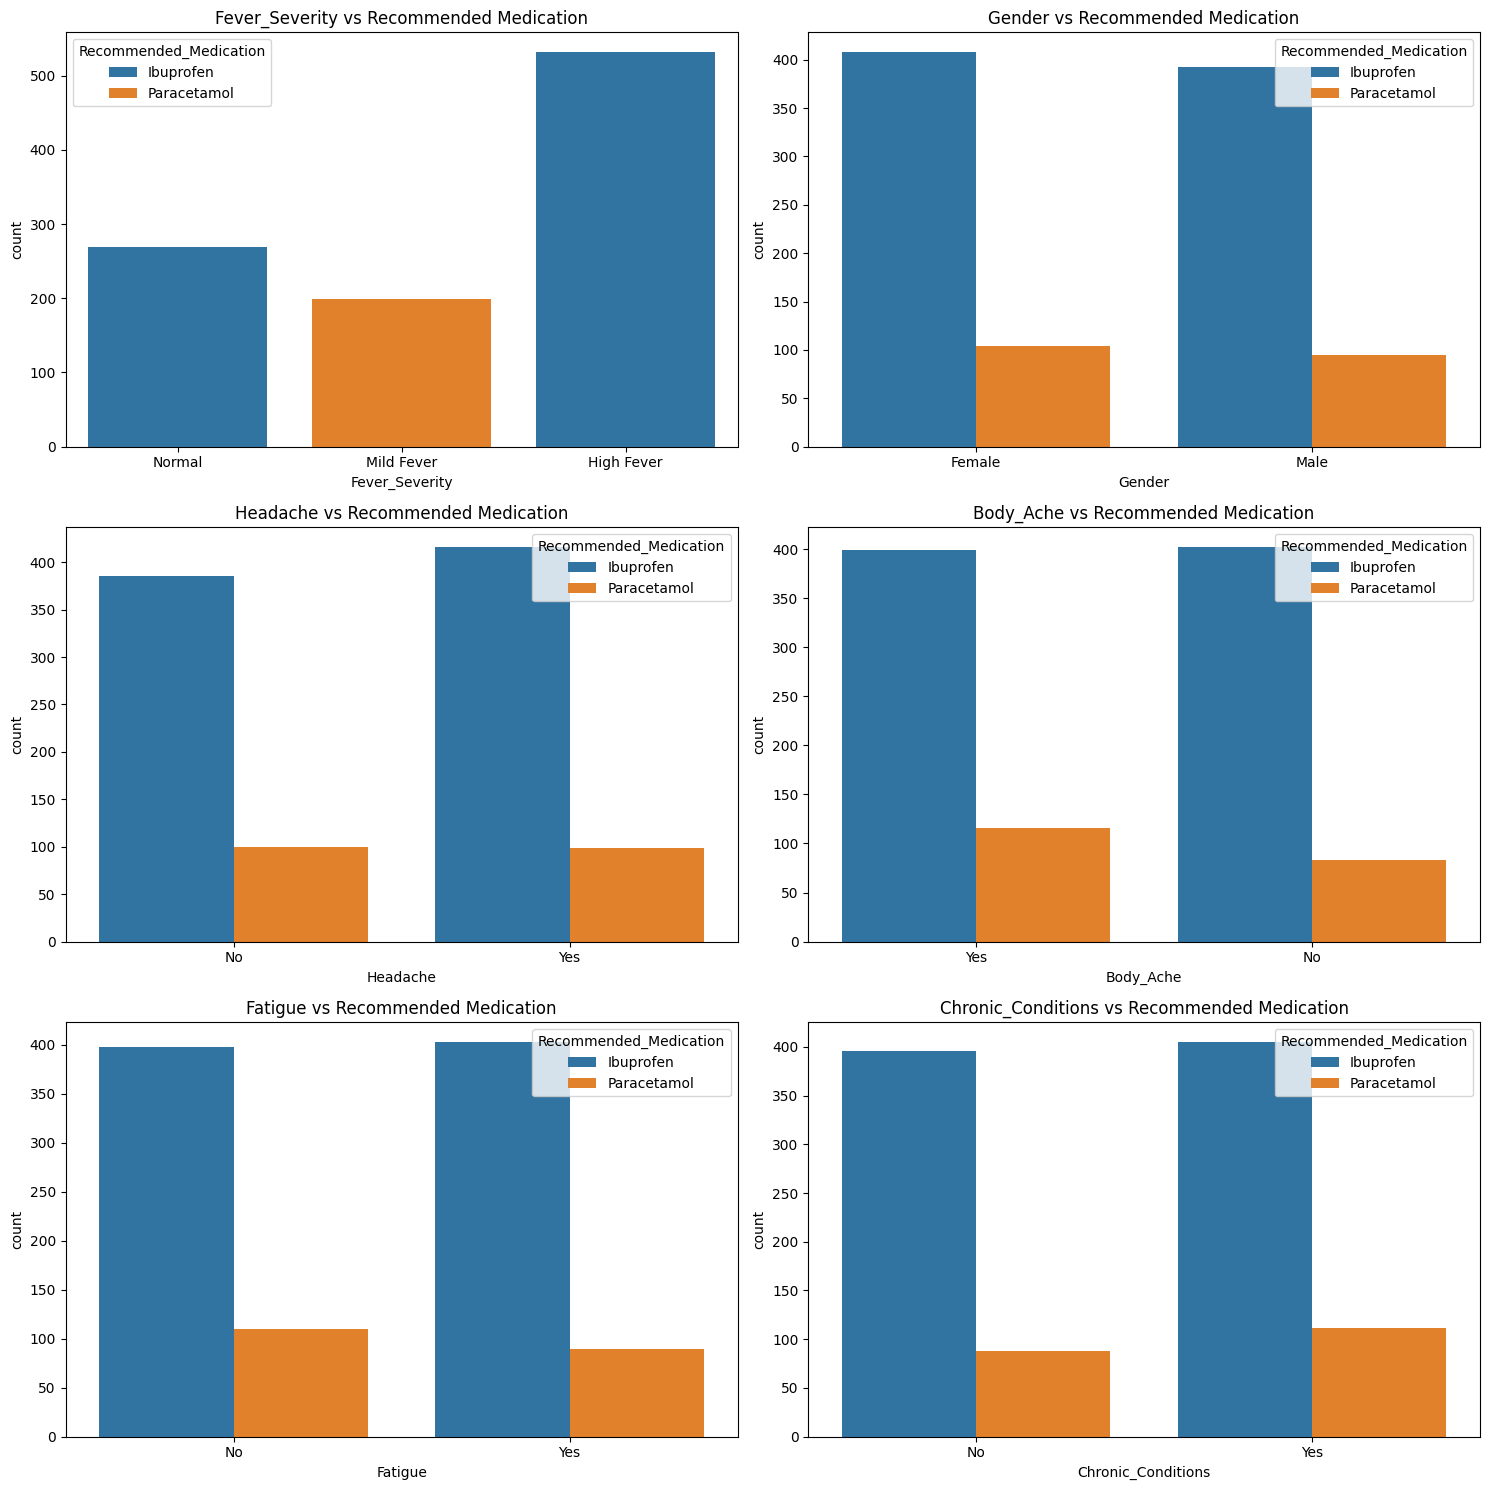

In [69]:
# Plot count plots for categorical variables against Recommended_Medication
categorical_columns = ['Fever_Severity', 'Gender', 'Headache', 'Body_Ache', 'Fatigue', 'Chronic_Conditions']
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
for ax, col in zip(axes.flatten(), categorical_columns):
    sns.countplot(data=data, x=col, hue='Recommended_Medication', ax=ax)
    ax.set_title(f'{col} vs Recommended Medication')
plt.tight_layout()
plt.show()

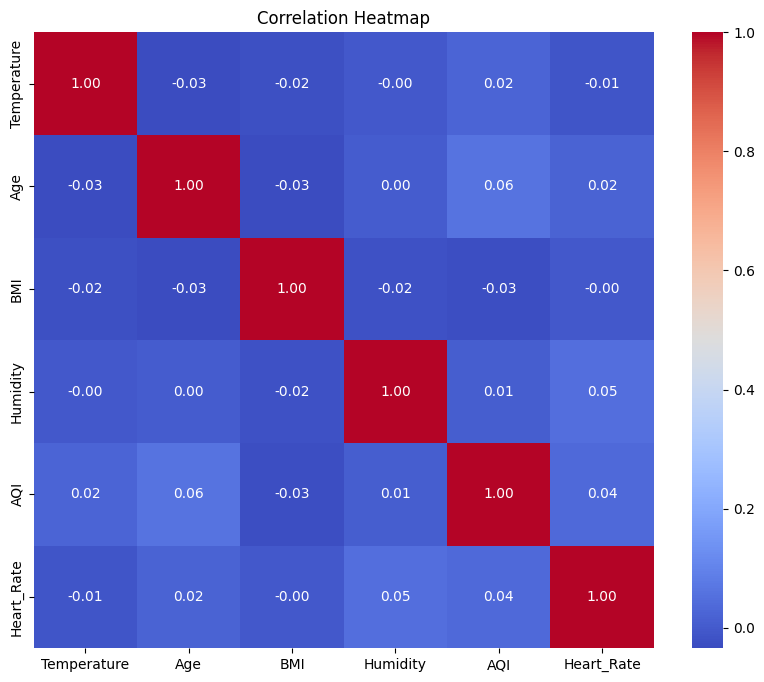

In [70]:
# Compute the correlation matrix
numeric_df = data.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [71]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features and target
X = data.drop('Recommended_Medication', axis=1)
y = data['Recommended_Medication']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [73]:
# Encode categorical features to numeric using LabelEncoder
le = LabelEncoder()

# Apply encoding to all categorical columns (assumed here to be object type)
categorical_columns = X_train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Print accuracy and classification report
print('Accuracy:', accuracy_score(y_test, y_pred) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 81.5
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.99      0.90       165
           1       0.00      0.00      0.00        35

    accuracy                           0.81       200
   macro avg       0.41      0.49      0.45       200
weighted avg       0.68      0.81      0.74       200



## Decision Tree Classification

In [75]:
# Create and train the Decision Tree Classifier
dec_clf = DecisionTreeClassifier(criterion='gini', random_state=3, max_depth=5)
dec_clf.fit(X_train, y_train)

# Make predictions
y_pred = dec_clf.predict(X_test)

# Print accuracy and classification report
print('Decision Tree Classifier accuracy:', dec_clf.score(X_test, y_test) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

Decision Tree Classifier accuracy: 100.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00        35

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Random Forest Classification

In [77]:
# Create and train the Random Forest classifier
rand_clf = RandomForestClassifier(n_estimators=20, criterion="entropy")
rand_clf.fit(X_train, y_train)

# Make predictions
y_pred = rand_clf.predict(X_test)

# Print accuracy and classification report
print('Random Forest Classifier accuracy:', rand_clf.score(X_test, y_test) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

Random Forest Classifier accuracy: 100.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00        35

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## SVM classification

In [79]:
# Create and train the SVM model with RBF kernel
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print accuracy and classification report
print('SVM Accuracy: ', accuracy_score(y_test, y_pred) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

SVM Accuracy:  82.5
Classification Report:               precision    recall  f1-score   support

           0       0.82      1.00      0.90       165
           1       0.00      0.00      0.00        35

    accuracy                           0.82       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.68      0.82      0.75       200



## Navie Bayes

In [81]:
# Create and train the Naive Bayes classifier
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train)

# Make predictions using Naive Bayes model
y_pred = NaiveBayes.predict(X_test)

# Print accuracy and classification report
print('The accuracy of Naive Bayes is:', accuracy_score(y_test, y_pred) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

The accuracy of Naive Bayes is: 100.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00        35

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Bagging Ensemble

In [83]:
# Initialize the base classifier
deci_clf = RandomForestClassifier()

# Initialize the Bagging classifier
clf_bagging = BaggingClassifier(estimator=deci_clf, n_estimators=20, random_state=42)

# Fit the Bagging classifier on the training data
clf_bagging.fit(X_train, y_train)

# Make predictions using the Bagging classifier
y_pred = clf_bagging.predict(X_test)

# Print the accuracy of the Bagging classifier
print('The accuracy of the bagging classifier is:', accuracy_score(y_test, y_pred) * 100)

The accuracy of the bagging classifier is: 100.0


## Boosting classifier

In [85]:
# Initialize the base classifier
deci_clf = RandomForestClassifier()

# Initialize the AdaBoost classifier
clf_boosting = AdaBoostClassifier(estimator=deci_clf, n_estimators=20, random_state=42)

# Fit the AdaBoost classifier on the training data
clf_boosting.fit(X_train, y_train)

# Make predictions using the AdaBoost classifier
y_pred = clf_boosting.predict(X_test)

# Print the accuracy of the AdaBoost classifier
print('The accuracy of the Boosting classifier is:', accuracy_score(y_test, y_pred) * 100)

The accuracy of the Boosting classifier is: 100.0


## Model Accuracy comparison

In [87]:

# Step 1: One-Hot Encode categorical columns (e.g., 'Gender')
X_encoded = pd.get_dummies(X, drop_first=True)  # Drop the first column to avoid dummy variable trap

# Step 2: Scale numeric features
# Use StandardScaler to standardize the numeric features.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Step 3: Define KFold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Step 4: List of classifiers and models
classifiers = ['Linear SVM', 'Radial SVM', 'Logistic Regression', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [
    SVC(kernel='linear'),
    SVC(kernel='rbf'),
    LogisticRegression(),
    DecisionTreeClassifier(),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100)
]

# Step 5: Initialize lists to store results
cv_mean = []
accuracy = []
std = []

# Step 6: Loop through each model, perform cross-validation, and store results
for model in models:
    cv_result = cross_val_score(model, X_scaled, y, cv=kfold, scoring="accuracy")
    cv_mean.append(cv_result.mean())  # Mean accuracy of cross-validation
    std.append(cv_result.std())  # Standard deviation of the cross-validation scores
    accuracy.append(cv_result)  # All accuracy scores

# Step 7: Create a DataFrame to summarize the results
results_df = pd.DataFrame({
    'CV Mean': cv_mean,
    'Std': std
}, index=classifiers)

# Display the results DataFrame
print(results_df)



                     CV Mean       Std
Linear SVM             0.801  0.038066
Radial SVM             0.876  0.036932
Logistic Regression    0.793  0.038743
Decision Tree          1.000  0.000000
Naive Bayes            1.000  0.000000
Random Forest          1.000  0.000000


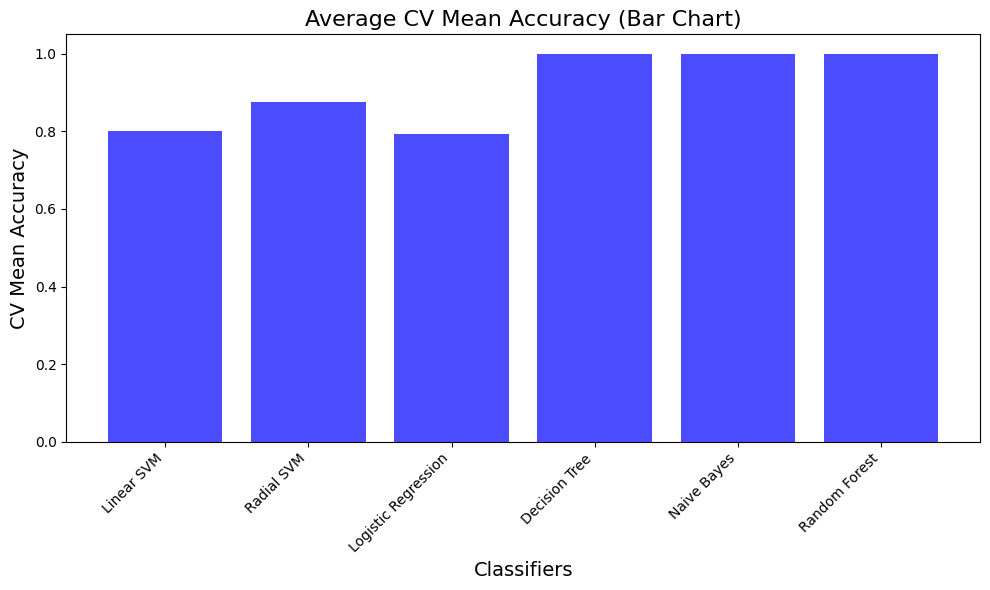

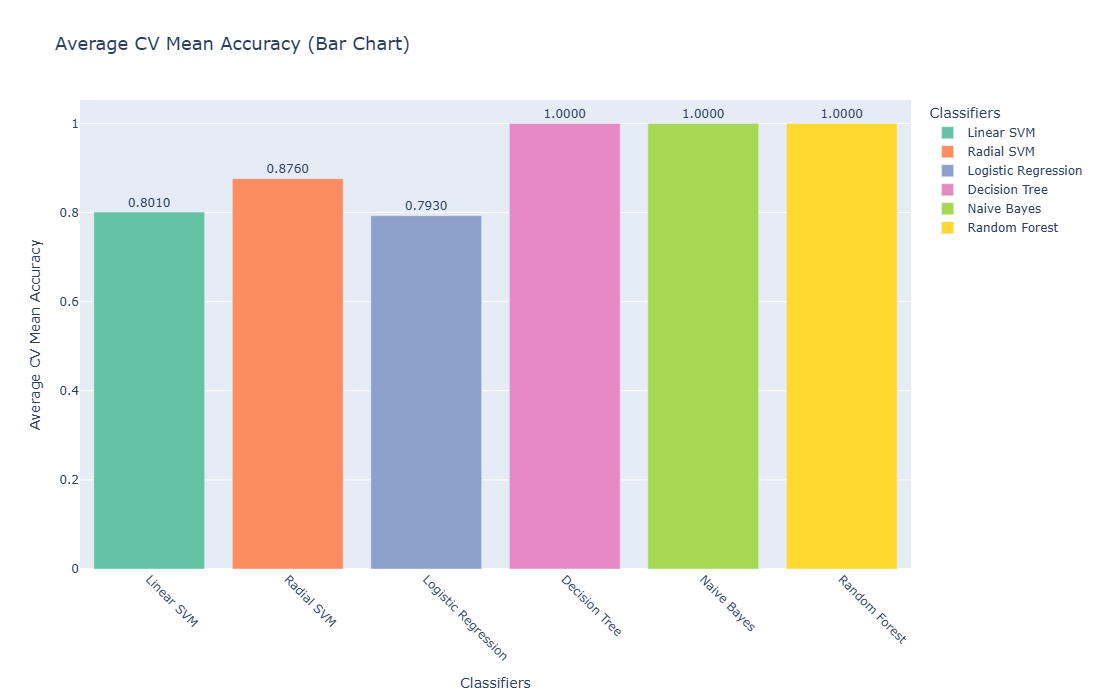

In [88]:
# Extract classifiers and their CV Mean values
classifiers = results_df.index.tolist()  # Classifier names
cv_mean = results_df['CV Mean'].tolist()  # CV Mean values

# --- Matplotlib Bar Chart ---
plt.figure(figsize=(10, 6))
plt.bar(classifiers, cv_mean, color='blue', alpha=0.7)
plt.title('Average CV Mean Accuracy (Bar Chart)', fontsize=16)
plt.xlabel('Classifiers', fontsize=14)
plt.ylabel('CV Mean Accuracy', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# --- Plotly Bar Chart ---
fig = px.bar(
    results_df.reset_index(),  # Reset index to access classifiers
    x='index',
    y='CV Mean',
    text='CV Mean',
    title='Average CV Mean Accuracy (Bar Chart)',
    labels={'index': 'Classifiers', 'CV Mean': 'Average Accuracy'},
    color='index',  # Optional: Color bars by classifier name
    color_discrete_sequence=px.colors.qualitative.Set2,
)

fig.update_traces(texttemplate='%{text:.4f}', textposition='outside')
fig.update_layout(
    xaxis_title="Classifiers",
    yaxis_title="Average CV Mean Accuracy",
    title_font_size=18,
    xaxis_tickangle=45,  # Rotate x-axis labels
    height=700,
    width=1100,
)
fig.show()


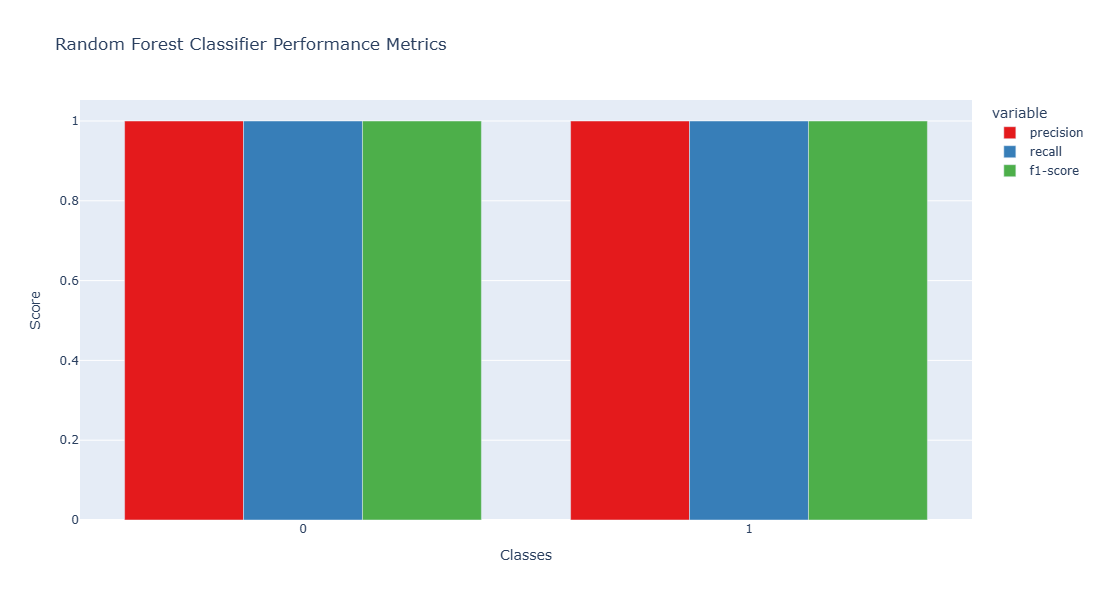

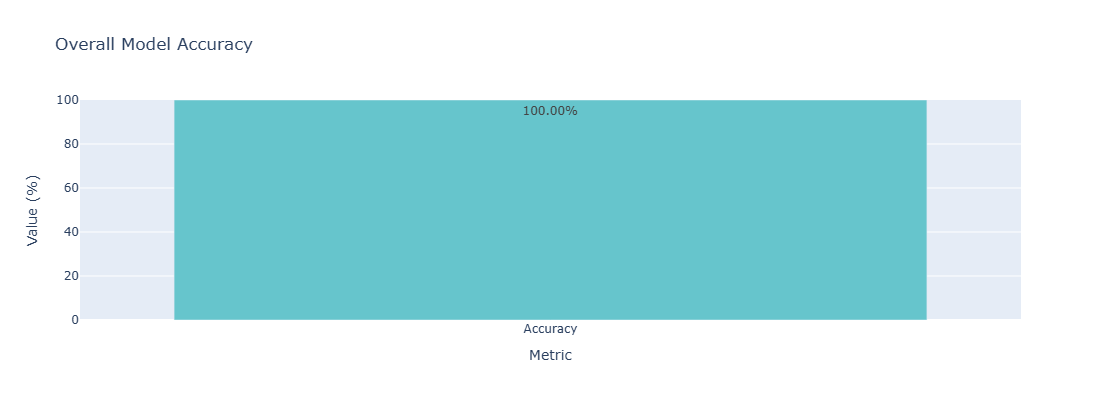

In [89]:
# Fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dec_clf = RandomForestClassifier(criterion='gini', random_state=3, max_depth=5)
dec_clf.fit(X_train, y_train)

# Make predictions
y_pred = dec_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100

# Generate the classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Prepare the data for visualization
metrics_df = pd.DataFrame(report).T.reset_index()  # Convert to DataFrame and reset index
metrics_df = metrics_df.rename(columns={'index': 'Class'})  # Rename the columns

# Filter out accuracy and support rows for bar chart visualization
metrics_to_plot = metrics_df[~metrics_df['Class'].isin(['accuracy', 'macro avg', 'weighted avg'])]

# Plot bar chart for precision, recall, and F1-score
fig = px.bar(
    metrics_to_plot,
    x="Class",
    y=["precision", "recall", "f1-score"],
    barmode="group",
    title="Random Forest Classifier Performance Metrics",
    labels={"value": "Score", "Class": "Classes"},
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig.update_layout(
    xaxis_title="Classes",
    yaxis_title="Score",
    height=600,
    width=800,
)
fig.show()

# Plot accuracy as a separate metric
fig_accuracy = px.bar(
    x=["Accuracy"],
    y=[accuracy],
    title="Overall Model Accuracy",
    text=[f"{accuracy:.2f}%"],
    labels={"x": "Metric", "y": "Value (%)"},
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig_accuracy.update_layout(
    height=400,
    width=600,
    yaxis=dict(range=[0, 100]),  # Ensure the range is 0-100%
)
fig_accuracy.show()
